In [1]:
import pandas as pd

df = pd.read_excel("./biblio_data_Replacement.xlsx")

# 데이터 확인
df.head(5)

C:\Users\User\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,국가서지번호,출처기관제어번호,자료유형,표제와 책임표시사항,제목,부제목,편제,권차,저자,판사항,...,접근정보,번역,번역원어,정부기관부호,정부간행물등록번호,출처,간행빈도,권차/연월차,ISSN,소장사항
0,NBC202245154,TP2022009866,장애인대체자료,5공 남산의 부장들[전자자료] /김충식 지음,5공 남산의 부장들,NaN,NaN,NaN,김충식,NaN,...,제작: 실로암점자도서관,N,NaN,NaN,NaN,대체자료종합목록,NaN,NaN,NaN,NaN
1,NBC202245154,TP2022031791,장애인대체자료,Kate and Nate are running late![녹음자료] /by Kat...,Kate and Nate are running late!,NaN,NaN,NaN,by Kate Egan ; illustrated by Dan Yaccarino,NaN,...,제작: 강서영어도서관,N,NaN,NaN,NaN,대체자료종합목록,NaN,NaN,NaN,NaN
2,NBC202245154,TP2022031775,장애인대체자료,Two bunny buddies[녹음자료] /Kathryn O. Galbraith...,Two bunny buddies,NaN,NaN,NaN,Kathryn O. Galbraith ; Illustrated by Joe Cepeda,NaN,...,제작: 강서영어도서관,N,NaN,NaN,NaN,대체자료종합목록,NaN,NaN,NaN,NaN
3,NBC202245154,TP2022031799,장애인대체자료,Zelda and Ivy[녹음자료] /by Laura McGee Kvasnosky,Zelda and Ivy,NaN,NaN,NaN,by Laura McGee Kvasnosky,NaN,...,제작: 강서영어도서관,N,NaN,NaN,NaN,대체자료종합목록,NaN,NaN,NaN,NaN
4,NBC202245154,TP2022006344,장애인대체자료,"#생태_소설[전자자료] /이혜원, 우찬제 엮음",#생태_소설,NaN,NaN,NaN,이혜원; 우찬제,NaN,...,제작: 실로암점자도서관,N,NaN,NaN,NaN,대체자료종합목록,NaN,NaN,NaN,NaN


In [2]:
data = df.loc[:,['국가서지번호', '출처기관제어번호', '자료유형','표제와 책임표시사항', '제목', '부제목', '저자', '발행처', '발행지역', '발행지코드', '내용유형', '크기', '가격', '본문언어','분야']]

In [3]:
data.fillna('No data', inplace=True)
# 데이터프레임의 데이터 유형 확인
data.dtypes

국가서지번호        object
출처기관제어번호      object
자료유형          object
표제와 책임표시사항    object
제목            object
부제목           object
저자            object
발행처           object
발행지역          object
발행지코드         object
내용유형          object
크기            object
가격            object
본문언어          object
분야            object
dtype: object

In [4]:
data['내용유형'].value_counts().head(60)

text                     17774
spoken word               2414
tactile text               587
tactile notated music       77
Name: 내용유형, dtype: int64

In [5]:
len(data)

20852

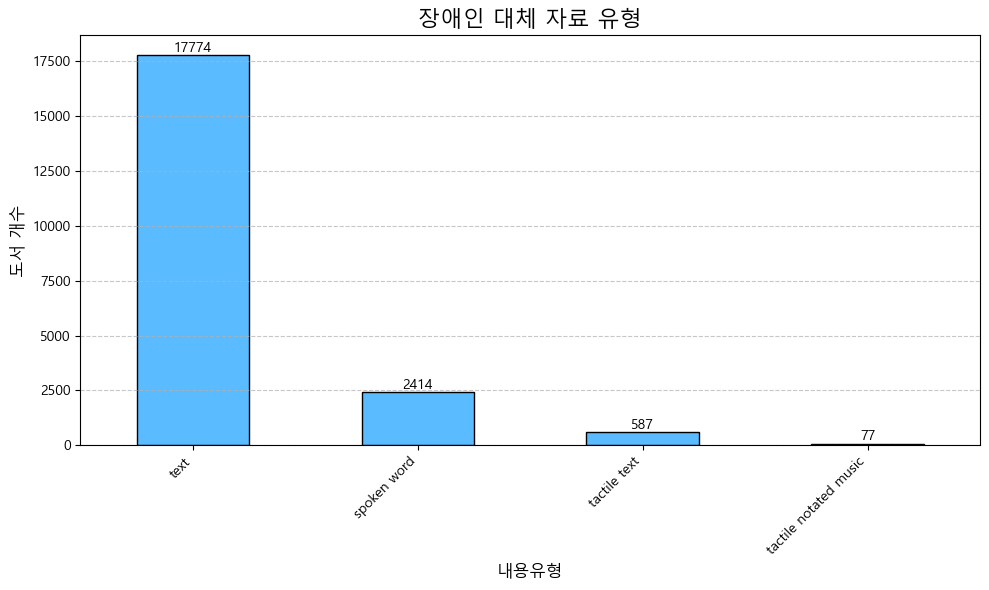

In [10]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (Windows 환경에서는 다른 폰트를 사용할 수 있음)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 발행처 빈도 상위 10개 가져오기
top_publishers = data['내용유형'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 6))
ax = top_publishers.plot(kind='bar', color='#5ABBFF', edgecolor='black')
plt.title('장애인 대체 자료 유형', fontsize=16)
plt.xlabel('내용유형', fontsize=12)
plt.ylabel('도서 개수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프에 개수 표시
for i, v in enumerate(top_publishers):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# 그래프 표시
plt.show()

In [7]:
data.fillna('No data', inplace=True)

In [8]:
data.to_csv('biblio_data_Replacement_updated_data.csv', index=False, encoding='utf-8-sig')